<a href="https://colab.research.google.com/github/anishd-github/ML-Projects/blob/main/Predicting%20Gold%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_set = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data_set.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


Printing Correlation as Heatmap

<ipython-input-6-09eb0eab87a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= data_set.corr()


<Axes: >

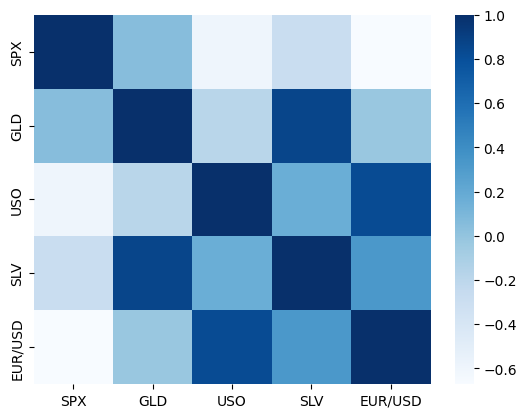

In [6]:
correlation= data_set.corr()
sns.heatmap(correlation, cmap='Blues')

In [7]:
print(correlation ['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [8]:
# gold is negatively correlated with eur, uso and positively correlated with spx and slv

In [9]:
# starting with regression
x= data_set.drop(['Date', 'GLD'], axis=1)  # x contains all data apart from date and gold prices
y= data_set['GLD']  # y contains the gold prices data
print (x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2)  # splitting data into training data and test data, 20% values of each x,y goes into training and test data resp.
rfregressor= RandomForestRegressor(n_estimators=100)  # invoking random forest regressor
rfregressor.fit(x_train, y_train)  # fitting x and y training data to the model

RandomForestRegressor()

In [23]:
predictionof_testdata= rfregressor.predict(x_test)
print(predictionof_testdata)

[168.29989945  82.0534999  116.20140028 127.69190118 120.71290114
 154.7515974  150.4492991  126.12080017 117.3323989  125.8857009
 117.14060083 171.90980056 141.90079822 167.99659951 115.07650013
 117.65550043 138.52320384 170.44020142 159.14980337 158.12999918
 154.94189965 125.17830014 175.7595999  157.30290393 125.09610035
  93.96369958  77.68220021 120.64670004 119.09969922 167.43249934
  88.04110121 125.22769993  91.1121008  117.69570036 121.1461987
 136.81740102 115.57880138 115.31450073 148.01220003 106.9471009
 104.37290257  87.20869807 126.51410024 118.12949978 154.67659897
 119.75190002 108.31649991 107.86359846  93.30200037 127.21469756
  75.02350023 113.61119922 121.22839978 111.19459899 118.85209878
 121.02819918 158.85240055 167.9952013  146.87249678  85.7284984
  94.23460012  86.78439934  90.67590061 118.97280079 126.50170065
 127.49640059 169.37750067 122.19869944 117.60189861  98.60330045
 167.85940074 143.06329856 131.64520241 121.18230208 121.22029913
 119.74300052 

In [26]:
#finding error using r squared method
error= metrics.r2_score( predictionof_testdata, y_test)
print(error)

0.9886884260070323


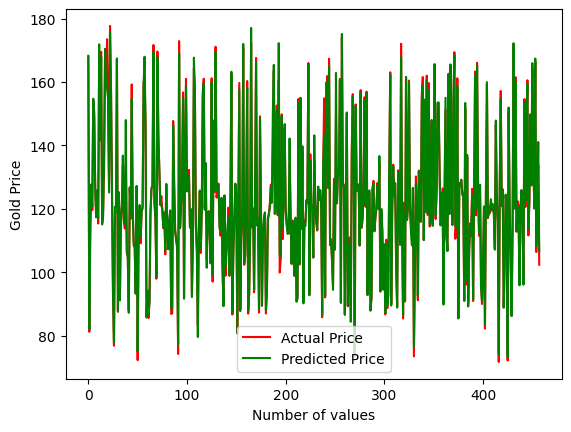

In [33]:
# plotting actual values vs predicted values
y_test= list(y_test)
plt.plot(y_test, color='red', label='Actual Price')
plt.plot(predictionof_testdata, color='green', label='Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()